

<h1 align="center">
    NSDC - HerWILL Data Science Contest
</h1>
  
<h2 align="center">
    Project: Fake News Detection
</h2>

<h3 align="center">
    Name: Muniza Alam
  </h3>


### **Please Read Before You Begin Your Project**

---



**Instructions: Google Colab Notebooks:**

Google Colab is a free cloud service. It is a hosted Jupyter notebook service that requires no setup to use, while providing free access to computing resources. We will be using Google Colab for this project.

In order to work within the Google Colab Notebook, **please start by clicking on "File" and then "Save a copy in Drive."** This will save a copy of the notebook in your personal Google Drive.

Please rename the file to "DS Contest - Fake News Detection - Your Full Name."

 **Please note that this contest must be done INDIVIDUALLY, submitting in teams will result in disqualification.**

You can now start working on the project. :)

For reference, you can see the code we followed for our sentiment analysis workshop, this might be a good example to have if you want some help:
Link https://github.com/raima2001/HerWILL-NSDC-Workshop-Content

**Project Description:**

This project will introduce students to an array of skills as they strive to create a fake news detection model to classify a given news article as real or fake. Fake News Detection leverages both Natural Language Processing and Machine Learning skills - how to represent text in a machine-understandable format so as to classify the text and extract whether a news is fake or real. We will also cover visualizations and how to deploy models in the real world.

**Dataset**

This is the link to the dataset for the contest:
https://raw.githubusercontent.com/raima2001/HerWILL-NSDC-DS-Contest/main/news_dataset_subset%20(1).csv

Task 1: Import all the necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelBinarizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

Task 2: Now read the dataset using Pandas (Marks: 1)

In [ ]:
url= 'https://raw.githubusercontent.com/raima2001/HerWILL-NSDC-DS-Contest/main/news_dataset_subset%20(1).csv'
data = pd.read_csv(url)

Task 3: Let's see what the data looks like. We can use the `head` function which returns the first 5 rows of the dataframe. (Marks: 1)

In [ ]:
data.head(5)

,text,word_label
0,No comment is expected from Barack Obama Membe...,real
1,Did they post their votes for Hillary already?,real
2,"Now, most of the demonstrators gathered last ...",real
3,A dozen politically active pastors came here f...,fake
4,"The RS-28 Sarmat missile, dubbed Satan 2, will...",real



Task 4: Use the `describe()` function which gives us a summary of the data. (Marks: 1)

In [ ]:
data.describe()

,text,word_label
count,6994,7000
unique,6832,2
top,,real
freq,77,3696


Task 5: Use `value_counts()` function to get the count of each unique value in the `word_label` column. (Marks: 1)

In [ ]:
value_counts_result = data['word_label'].value_counts()
print(value_counts_result)

real    3696
fake    3304
Name: word_label, dtype: int64


Task 6: Now that we have found the value_counts, create a bar plot to show the distribution. You can refer to this on how to create bar plots:
https://www.analyticsvidhya.com/blog/2021/08/understanding-bar-plots-in-python-beginners-guide-to-data-visualization/
Make sure you are giving a title, x-label and y-label.

Marks: 3

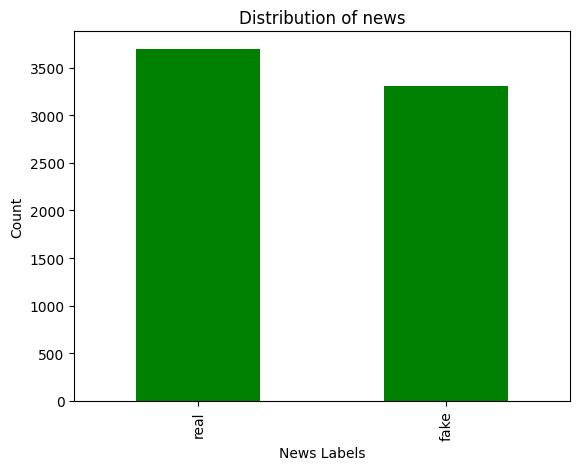

In [ ]:
plt.figure
value_counts_result.plot(kind='bar', color='g')

plt.title('Distribution of news')
plt.xlabel('News Labels')
plt.ylabel('Count')

plt.show()

Task7: Use info() function to get all the necessary details of your data. (Marks:1)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   text        6994 non-null   object
 1   word_label  7000 non-null   object
dtypes: object(2)
memory usage: 109.5+ KB


Task 8: You must have noticed that there are null values in the dataset. So write a code to see how many total null values we have in the 'text' column. Hint: use the isnull() and sum() functions for this.

Marks: 1

In [ ]:
null_value = data['text'].isnull().sum()
print(null_value)

6




```
# This is formatted as code
```

Task 9: Unless we fill in the null values, we will get errors later when we tokenized it. So us fillna() function and fill it with 'No info'.
(Marks: 2)

In [ ]:
df = pd.DataFrame(data)
df['text'].fillna('No info', inplace=True)
df


,text,word_label
0,No comment is expected from Barack Obama Membe...,real
1,Did they post their votes for Hillary already?,real
2,"Now, most of the demonstrators gathered last ...",real
3,A dozen politically active pastors came here f...,fake
4,"The RS-28 Sarmat missile, dubbed Satan 2, will...",real
...,...,...
6995,"RAMALLAH, West Bank (Reuters) - Palestinian Pr...",fake
6996,Donald J. Trump on Wednesday offered a defiant...,fake
6997,No info,real
6998,,real


Task 10: Lets turn the text column to string by using astype(str) function. (Marks: 2)

In [ ]:
df['text'] = df['text'].astype(str)
df

,text,word_label
0,No comment is expected from Barack Obama Membe...,real
1,Did they post their votes for Hillary already?,real
2,"Now, most of the demonstrators gathered last ...",real
3,A dozen politically active pastors came here f...,fake
4,"The RS-28 Sarmat missile, dubbed Satan 2, will...",real
...,...,...
6995,"RAMALLAH, West Bank (Reuters) - Palestinian Pr...",fake
6996,Donald J. Trump on Wednesday offered a defiant...,fake
6997,No info,real
6998,,real



---

Text preprocessing with Natural Language Processing.

---
---

Task 11: Apply word_tokenize to tokenize the sentences into words. (Marks: 2)

In [ ]:
nltk.download('punkt')
data['tokenized_text'] = data['text'].apply(word_tokenize)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
data

,text,word_label,tokenized_text
0,No comment is expected from Barack Obama Membe...,real,"[No, comment, is, expected, from, Barack, Obam..."
1,Did they post their votes for Hillary already?,real,"[Did, they, post, their, votes, for, Hillary, ..."
2,"Now, most of the demonstrators gathered last ...",real,"[Now, ,, most, of, the, demonstrators, gathere..."
3,A dozen politically active pastors came here f...,fake,"[A, dozen, politically, active, pastors, came,..."
4,"The RS-28 Sarmat missile, dubbed Satan 2, will...",real,"[The, RS-28, Sarmat, missile, ,, dubbed, Satan..."
...,...,...,...
6995,"RAMALLAH, West Bank (Reuters) - Palestinian Pr...",fake,"[RAMALLAH, ,, West, Bank, (, Reuters, ), -, Pa..."
6996,Donald J. Trump on Wednesday offered a defiant...,fake,"[Donald, J., Trump, on, Wednesday, offered, a,..."
6997,No info,real,"[No, info]"
6998,,real,[]


Task 12: Apply isalpha() to remove punctuations and symbols. (Marks: 2)

In [ ]:
data['tokenized_text'] = data['tokenized_text'].apply(lambda x: [word for word in x if word.isalpha() and word not in string.punctuation])

Task 13: Apply islower() to turn all the sentences to lowercase. (Marks: 2)

In [ ]:
data['tokenized_text'] = data['tokenized_text'].apply(lambda x: [word.lower() for word in x])

Task 14: Apply stopwords to remove all the filler words.
(Marks: 2)

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
data['tokenized_text'] = data['tokenized_text'].apply(lambda x: [word for word in x if word not in stop_words])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Task 15: Apply lemmatizer to get the base word. Use this as reference to apply lemmatizing: https://www.holisticseo.digital/python-seo/nltk/lemmatize
(Marks: 2)

In [ ]:
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

data['tokenized_text'] = data['tokenized_text'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


---

Task 16:
Apply PorterStemmer() to your 'text' column
(Marks:2)

In [ ]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

data['tokenized_text'] = data['tokenized_text'].apply(lambda x: [ps.stem(item) for item in x])

In [ ]:
data['tokenized_text']

0       [comment, expect, barack, obama, member, fukyo...
1                          [post, vote, hillari, alreadi]
2       [demonstr, gather, last, night, exercis, const...
3       [dozen, polit, activ, pastor, came, privat, di...
4       [sarmat, missil, dub, satan, replac, fli, mile...
                              ...                        
6995    [ramallah, west, bank, reuter, palestinian, pr...
6996    [donald, trump, wednesday, offer, defiant, def...
6997                                               [info]
6998                                                   []
6999    [u, never, separ, fighter, depend, dan, glazeb...
Name: tokenized_text, Length: 7000, dtype: object

Task 17: Join the 'text' column to get the full propocessed form. For simplicity, I am giving you part of the code:  **.apply(lambda x: " ".join(x))** (Marks:1)

In [ ]:
data['tokenized_text'] = data['tokenized_text'].apply(lambda x: " ".join(x))
data['tokenized_text']

0       comment expect barack obama member fukyoflag b...
1                               post vote hillari alreadi
2       demonstr gather last night exercis constitut p...
3       dozen polit activ pastor came privat dinner fr...
4       sarmat missil dub satan replac fli mile per se...
                              ...                        
6995    ramallah west bank reuter palestinian presid m...
6996    donald trump wednesday offer defiant defens ca...
6997                                                 info
6998                                                     
6999    u never separ fighter depend dan glazebrook no...
Name: tokenized_text, Length: 7000, dtype: object

Task 18: Split the 'text' column data for training. Use the first 5000 rows for training. (Marks:1)


In [ ]:
from sklearn.model_selection import train_test_split
text_train = data['tokenized_text'][:5000]

Task 19: Split the 'text' column data for testing. Use the remaining rows for training. Hint: df.text[5000:]
(Marks:1)

In [ ]:
text_test = data['text'][5000:]

Task 20:
Now let us do the same for the 'word_label' column. Split it into training and
testing. First 5000 rows for training and remaining for testing. (Marks:2)

In [ ]:
label_train = data['word_label'][:5000]

In [ ]:
label_test = data['word_label'][5000:]

Task 21: Initiatize CountVectorizer() (Marks:2)



In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(min_df=2, max_df=0.9, binary=False, ngram_range=(1, 3))
# cv = CountVectorizer(stop_words='english', lowercase=True, min_df=2, max_df=0.9, binary=False, ngram_range=(1, 2))

Task 22: Fit transform the training text. (Marks:1)

In [ ]:
cv_text_train = cv.fit_transform(text_train)

Task 23: Transform the test  text. (Marks:1)

In [ ]:
cv_text_test = cv.transform(text_test)

Task 24: Initialize the LabelBinarizer() (Marks:1)

In [ ]:
lb = LabelBinarizer()

Task 25: Fit transform the training labels. (Marks:1)

In [ ]:
lb_label_train = lb.fit_transform(label_train)

Task 26: Fit transform the testing labels. (Marks:1)

In [ ]:
lb_label_test = lb.fit_transform(label_test)

Task 27:
- Initialize the Multinomial Naive Bayes Model
- Fit the data to the model
-  Predict the labels
- find the Accuracy

Marks:4

In [ ]:
mnb = MultinomialNB()

In [ ]:
mnb.fit(cv_text_train, lb_label_train)

MultinomialNB()

In [ ]:
train_predictions = mnb.predict(cv_text_train)
test_predictions = mnb.predict(cv_text_test)

In [ ]:
train_accuracy = accuracy_score(lb_label_train, train_predictions)
test_accuracy = accuracy_score(lb_label_test, test_predictions)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

Training Accuracy: 0.9722
Testing Accuracy: 0.785


Task 28: Time to do the same but with a different Machine Learning Model (Support Vector Machine). Use this as reference for learning about SVMs: https://www.geeksforgeeks.org/support-vector-machine-algorithm/

- Initialize the Support Vector Machine Model
- Fit the data to the model
-  Predict the labels
- find the Accuracy

Marks:4

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svm_model = SVC(kernel='linear')

svm_model.fit(cv_text_train, lb_label_train)

train_predictions_svm = svm_model.predict(cv_text_train)
test_predictions_svm = svm_model.predict(cv_text_test)

train_accuracy_svm = accuracy_score(lb_label_train, train_predictions_svm)
test_accuracy_svm = accuracy_score(lb_label_test, test_predictions_svm)

print("SVM Training Accuracy:", train_accuracy_svm)
print("SVM Testing Accuracy:", test_accuracy_svm)


SVM Training Accuracy: 0.9998
SVM Testing Accuracy: 0.7595


Task 29: Apply WordCloud to get a visual representation of the most used words from 'real' news. Marks:2

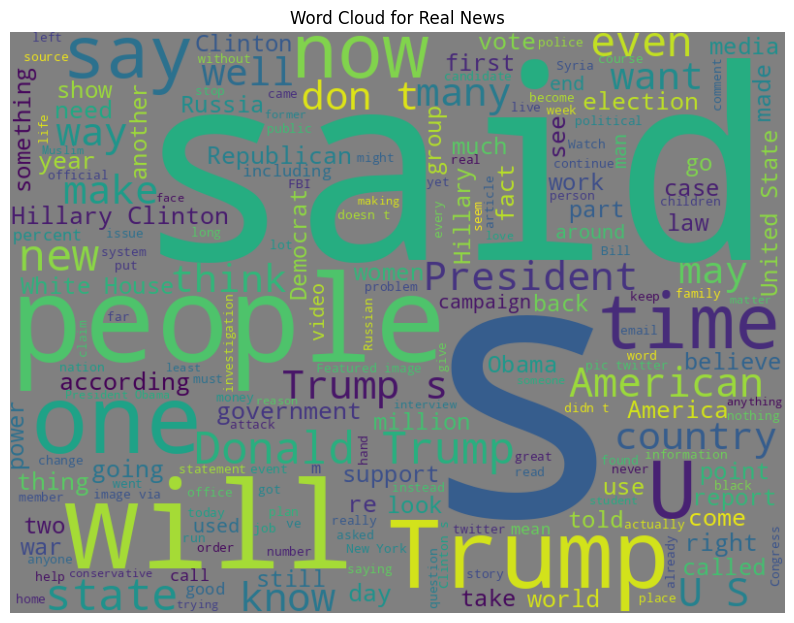

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

real_news_text = data[data['word_label'] == 'real']['text']
real_text_combined = ' '.join(real_news_text)

# Generate WordCloud
wordcloud = WordCloud(width=800, height=600, background_color='gray').generate(real_text_combined)

# Display the WordCloud using matplotlib
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Real News')
plt.show()
